# Data processing

### This notebook summarize the work I've done so far on the housing aspect of the Youth Service Bureau project. I took down the word document that I posted earlier since I've included all the data that it had in this notebook.

## Load librairies and data

In [3]:
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import collections
from datetime import date
import warnings
warnings.filterwarnings("ignore",category=Warning)

# #Plot attributes
height = 8
width = 15
plt.style.use('seaborn-darkgrid')
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 15

#Load data
clients = pd.read_csv('../data/YSB/YSBActiveClientsV1.csv')
programs = pd.read_csv('../data/YSB/YSBActiveProgramsV1.csv')
programmees = pd.read_csv('../data/YSB/YSBActiveProgrammeesV1.csv')
programmees['EntryDate'] = pd.to_datetime(programmees['EntryDate'], errors='coerce')
programmees['ExitDate'] = pd.to_datetime(programmees['ExitDate'], errors='coerce')
programmees = programmees.merge(clients,on='clientID',how='left')
housing_programs = programs[programs['ProgramCategory'].notnull()]
housing_programs = housing_programs[housing_programs['ProgramCategory'].str.contains("Housing")]
housing = programmees[programmees['Program'].isin(housing_programs['Program'])]

#Set # of days spent for each entry
has_exit = pd.notnull(housing['ExitDate'])
nb_records = has_exit.shape[0]
housing_exit = housing[has_exit]
DaysSpent = housing_exit['ExitDate']-housing_exit['EntryDate']
temp = [DaysSpent.iloc[x].days for x in range(len(DaysSpent))]
housing_exit['DaysSpent'] = temp

## Load functions

In [4]:
def autolabel(x,y,labels):
    """
    Attach a text label above each bar displaying its height
    """
    for label_i in range(len(labels)):
        label = labels[label_i]
        height = y[label_i]
        ax.text(x[label_i], height, str(label), ha='center', va='bottom', 
                fontsize = 15, weight = 'bold')

# Data exploration

In [3]:
print(housing.shape)
print(housing_exit.shape)


(1333, 14)
(825, 15)


In [4]:
housing_programs.head(10)


,Program,ProgramDescription,ProgramType,Function,Active,YSB.Flag,ProgramCategory,ProgamSubCategory,Cultural.Group,Target.Audience,Initiative,AgencyID,Agency,AgencySite,AgencyPostalCode
4,YSB-Crisis Residential,NaN,Temporary,Temporary,1,Y,Housing,Shelter,NaN,NaN,NaN,100,YSB,Youth Services Bureau - Main Office,K2B 8K2
6,YSB-Evelyn Horne Transitional Housing,NaN,E Horne Shelter & Transitional Housing,Temporary,1,Y,Housing,Short-term Housing,NaN,Woman,NaN,100,YSB,Youth Services Bureau - Main Office,K2B 8K2
7,YSB-HBCM Housing,YSB-HBCM Housing,Temporary,NaN,1,Y,Housing,NaN,NaN,NaN,NaN,100,YSB,Youth Services Bureau - Main Office,K2B 8K2
8,YSB-HBCM Managing Tenancy,YSB-HBCM Managing Tenancy,Temporary,NaN,1,Y,Housing,NaN,NaN,NaN,NaN,100,YSB,Youth Services Bureau - Main Office,K2B 8K2
9,YSB-Housing - Carruthers,NaN,Housing Unit,Temporary,1,Y,Housing,Long-term Housing,NaN,NaN,NaN,114,YSB,YSB Carruthers,K1Y 1N5
10,YSB-Housing - Queen Mary,NaN,Housing Unit,Temporary,1,Y,Housing,Housing,NaN,NaN,Housing First,115,YSB,YSB Queen Mary,K1K 1W1
11,YSB-Housing - Ron Kolbus (McEwen),NaN,Housing Unit,Temporary,1,Y,Housing,Housing,NaN,NaN,Housing First,113,YSB,YSB Ron Kolbus,K2B 1B4
31,YSB-YMETH,YSB-Young Men's Transitional Housing,Temporary,Temporary,0,Y,Housing,Short-term Housing,NaN,Young Men,Housing First,100,YSB,Youth Services Bureau - Main Office,K2B 8K2
32,YSB-Young Men's Emergency Shelter,NaN,Temporary,Temporary,1,Y,Housing,Shelter,NaN,Young Men,NaN,103,YSB,YSB Young Men's Shelter,K2P 0H1
33,YSB-Young Women's Emergency Shelter,NaN,E Horne Shelter & Transitional Housing,Temporary,1,Y,Housing,Shelter,NaN,Young Women,NaN,104,YSB,YSB Young Women's Shelter,K1N 7S6


### There are 10 different active programs that are in the "Housing" category, all listed above. There are 1333 admissions in total and 825 of those have an exit date (the other only have an entry date).

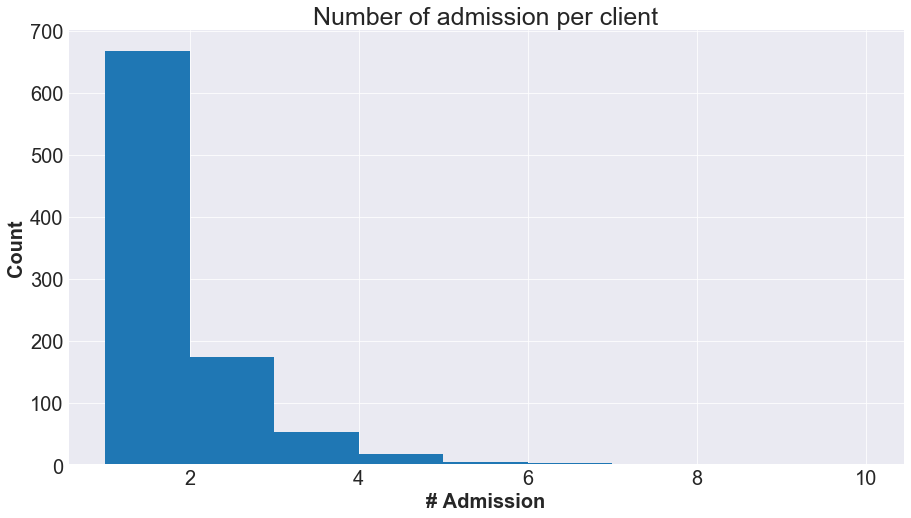

In [5]:
counter_clients = collections.Counter(housing['clientID'])
counts = [counter_clients[x] for x in counter_clients]
bins = range(1,11)
fig = plt.figure(figsize=(width,height))
plt.hist(counts,bins=bins)
ax = plt.axes()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='both', which='major', labelsize=20)
[j[1].set_linewidth(3) for j in list(ax.spines.items())]
plt.xlabel('# Admission')
plt.ylabel('Count')
plt.title('Number of admission per client')
plt.show()

In [6]:
print(len(counter_clients))
print(np.mean(counts))
print(len(np.where(np.array(counts)==1)[0]))

926
1.43952483801
667


### There are 926 unique clients, and 667 of them only have 1 admission. The average number of admission is 1.44.

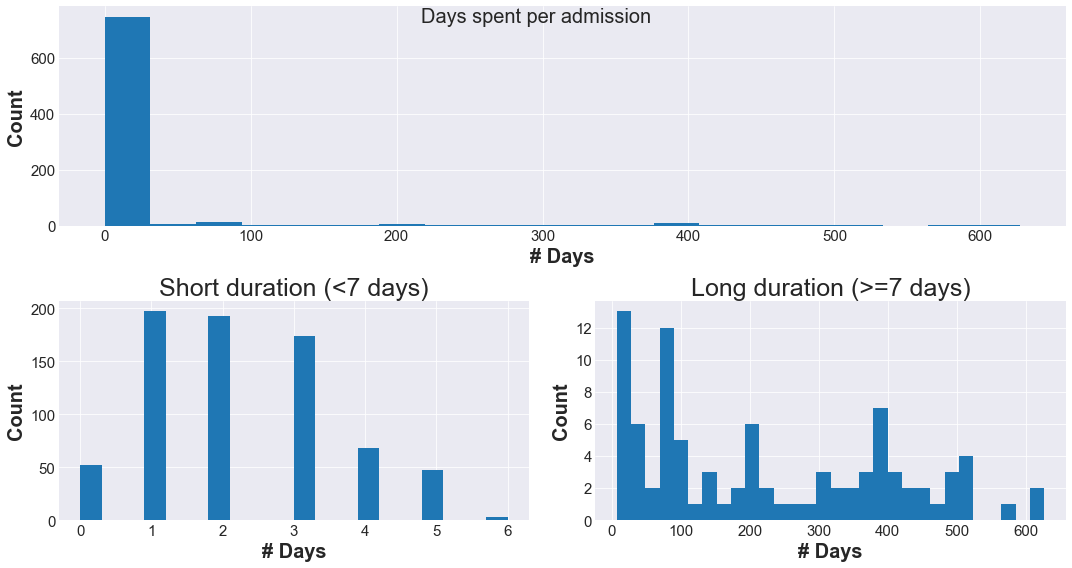

In [7]:
#Time spent
days_spent = np.array(housing_exit['DaysSpent'])
fig = plt.figure(figsize=(width,height))
plt.subplot2grid((2,2),(0,0),colspan=2)
plt.suptitle('Days spent per admission',fontsize=20)
plt.hist(days_spent,bins=20)
plt.xlabel('# Days')
plt.ylabel('Count')
plt.subplot2grid((2,2),(1,0))
plt.hist(days_spent[np.where(days_spent<7)[0]],bins=20)
plt.xlabel('# Days')
plt.ylabel('Count')
plt.title('Short duration (<7 days)')
plt.subplot2grid((2,2),(1,1))
plt.hist(days_spent[np.where(days_spent>=7)[0]],bins=30)
plt.xlabel('# Days')
plt.ylabel('Count')
plt.title('Long duration (>=7 days)')
fig.tight_layout()
plt.show()

In [8]:
print(len(np.where(days_spent<7)[0]))
print(len(np.where(days_spent>=7)[0]))

734
91


### While we can see that most entries (734) have a duration shorter than 7 days, some clients get admitted for much longer duration.

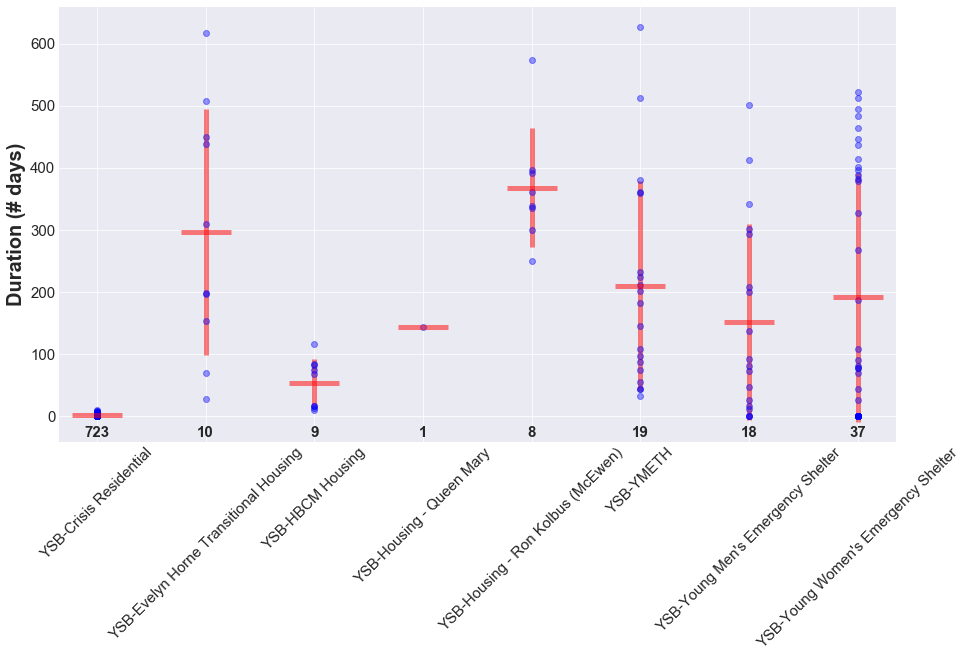

In [9]:
df_avg = housing_exit.groupby('Program').mean()
df_std = housing_exit.groupby('Program').std()
days_spent = housing_exit['DaysSpent']
programs_entries = housing_exit['Program']
count = housing_exit.groupby('Program')['clientID'].count()
programs = df_avg.index.values
n_prog = len(programs)
ind = np.arange(n_prog)  # the x locations for the groups
ind_indices = [np.where(programs == x)[0]+1 for x in programs_entries]
xaxis = range(1,len(programs)+1)
y = np.ones(len(xaxis))-40
fig = plt.figure(figsize=(width,height))
ax = plt.axes()
#plt.subplot2grid((2,2),(0,0),colspan=2)
plt.plot(ind_indices,days_spent,'bo',alpha=0.4)
plt.errorbar(xaxis,df_avg['DaysSpent'],yerr=df_std['DaysSpent'],
             color='r',fmt='_',linewidth=5,markersize=50,mew=5,alpha=0.5)
ax.set_xticks(xaxis)
ax.set_xticklabels(programs, rotation=45,fontsize=15)
plt.ylabel('Duration (# days)')
autolabel(xaxis,y,count)
plt.show()

### We can see from the figure above that most entries are in the Crisis Residential program (723 entries), and that most of those are of short duration. All the other programs have fewer entries and have their admission last for very long period. For now, we are going to split the programs in two groups, the Crisis Residential programs, and the other programs (all programs excluding Crisis residential).

### Lets first try to see if there are any differences in the distributions of admission durations for the two groups.

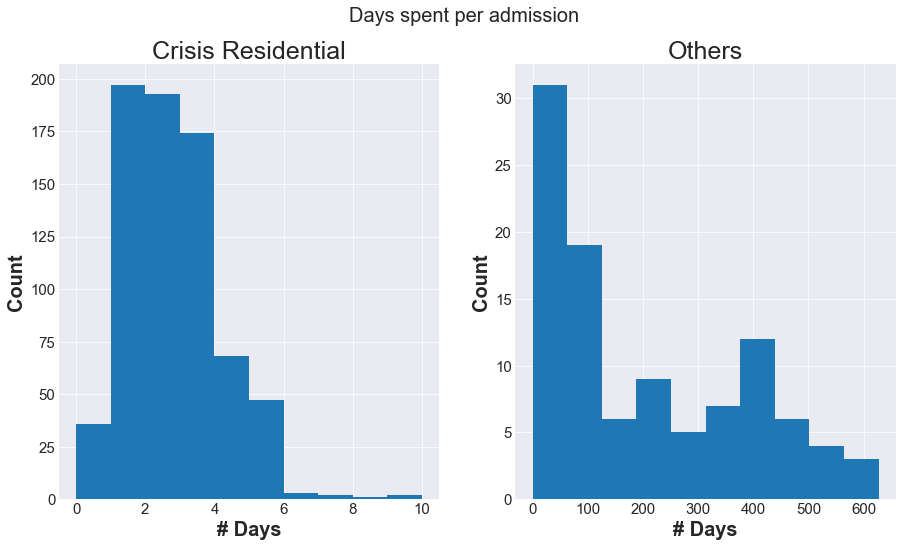

In [8]:
df_others = housing_exit[housing_exit['Program']!="YSB-Crisis Residential"]
df_crisis = housing_exit[housing_exit['Program']=="YSB-Crisis Residential"]
days_spent = np.array(housing_exit['DaysSpent'])

fig = plt.figure(figsize=(width,height))
plt.subplot2grid((1,2),(0,0))
plt.suptitle('Days spent per admission',fontsize=20)
plt.hist(df_crisis['DaysSpent'],bins=10)
plt.xlabel('# Days')
plt.ylabel('Count')
plt.title('Crisis Residential')
plt.subplot2grid((1,2),(0,1))
plt.hist(df_others['DaysSpent'],bins=10)
plt.xlabel('# Days')
plt.ylabel('Count')
plt.title("Others")
plt.show()

### While the Crisis Residential have unimodal distribution close to normality, the duration of admission for the other programs seem s to be bimodal, which hint toward two group of clients. Let's try to find systematic differences between those two populations.

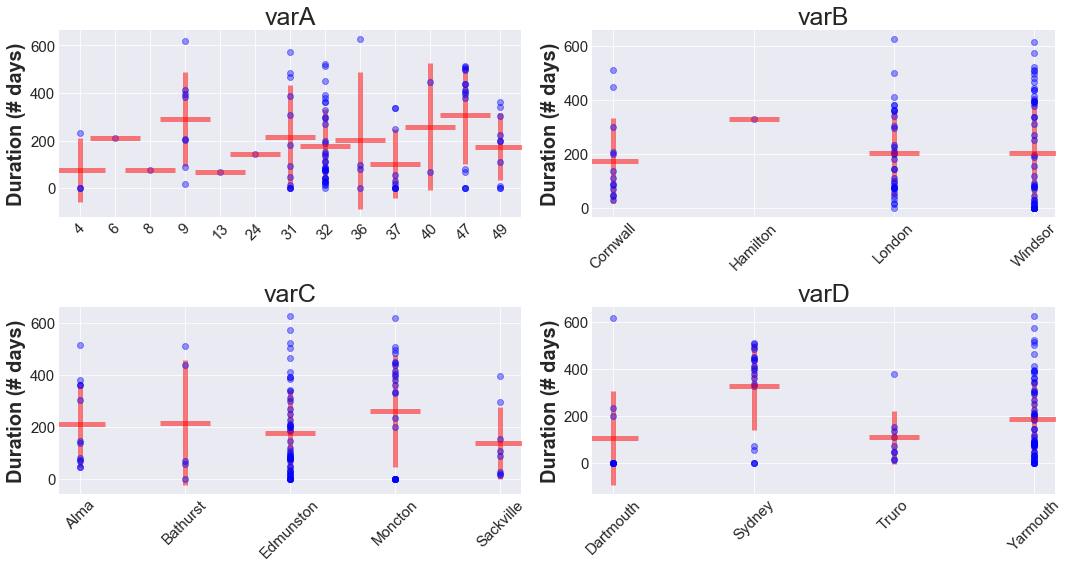

In [12]:
variables = ['varA','varB','varC','varD']
pannel = [(0,0),(0,1),(1,0),(1,1)]
days_spent = df_others['DaysSpent']

fig = plt.subplots(figsize=(width,height))

for var_i in range(len(variables)):
    df_avg = df_others.groupby(variables[var_i]).mean()
    df_std = df_others.groupby(variables[var_i]).std()
    var_entries = df_others[variables[var_i]]

    values = df_avg.index.values
    n_val = len(values)

    plt.subplot2grid((2,2),pannel[var_i])
    ind = np.arange(n_val)  # the x locations for the groups
    ind_indices = [np.where(values == x)[0]+1 for x in var_entries]
    xaxis = range(1,len(values)+1)
    plt.plot(ind_indices,days_spent,'bo',alpha=0.4)
    plt.errorbar(xaxis,df_avg['DaysSpent'],df_std['DaysSpent'],
                 color='r',fmt='_',linewidth=5,markersize=50,mew=5,alpha=0.5)
    plt.xticks(xaxis,values, rotation=45,fontsize=15)
    plt.ylabel('Duration (# days)')
    plt.title(variables[var_i])

plt.tight_layout()
plt.show()

### There are some trends for some variables (some choices have an higher average duration than the others, mostly for variable D. However at this level it is hard to extract meaningful information. I will try to apply some simple model to do some prediction. But before that, given that I pooled admisssion across all programs except "crisis" together, I'll repeat this analysis for the program with most entries: YSB-Young Women's Emergency Shelter. The objective is to see if this could potentially make trends a bit clearer by reducing noise that could come from having data from different programs.

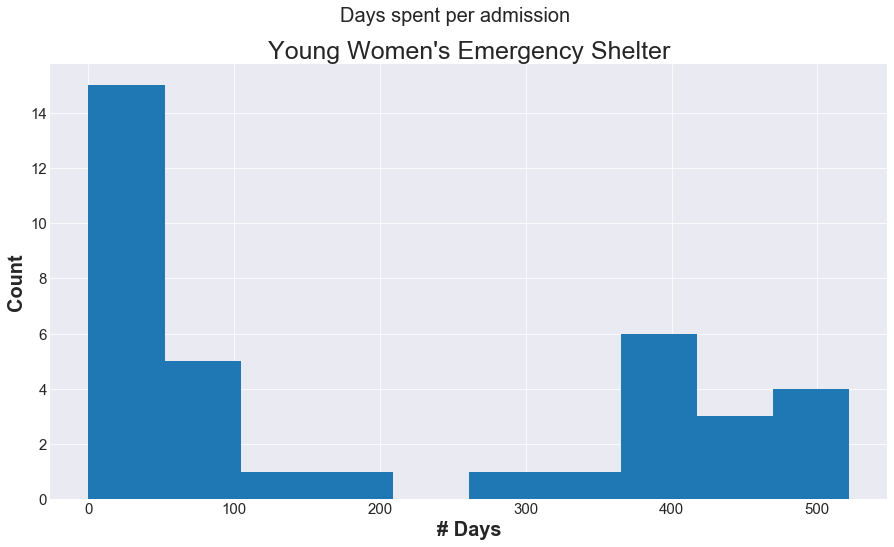

In [13]:
df_women = housing_exit[housing_exit['Program']=="YSB-Young Women's Emergency Shelter"]
df_crisis = housing_exit[housing_exit['Program']=="YSB-Crisis Residential"]
days_spent = np.array(housing_exit['DaysSpent'])

fig = plt.figure(figsize=(width,height))
plt.suptitle('Days spent per admission',fontsize=20)
plt.hist(df_women['DaysSpent'],bins=10)
plt.xlabel('# Days')
plt.ylabel('Count')
plt.title("Young Women's Emergency Shelter")
plt.show()

### The Young Women's Emergency shelter appears to have a bimodal distribution (each entry is a unique client, there is no reoccurence for this program) with a sharper separation. Let's see if we can have information about those two subpopulations.

# Prediction of duration

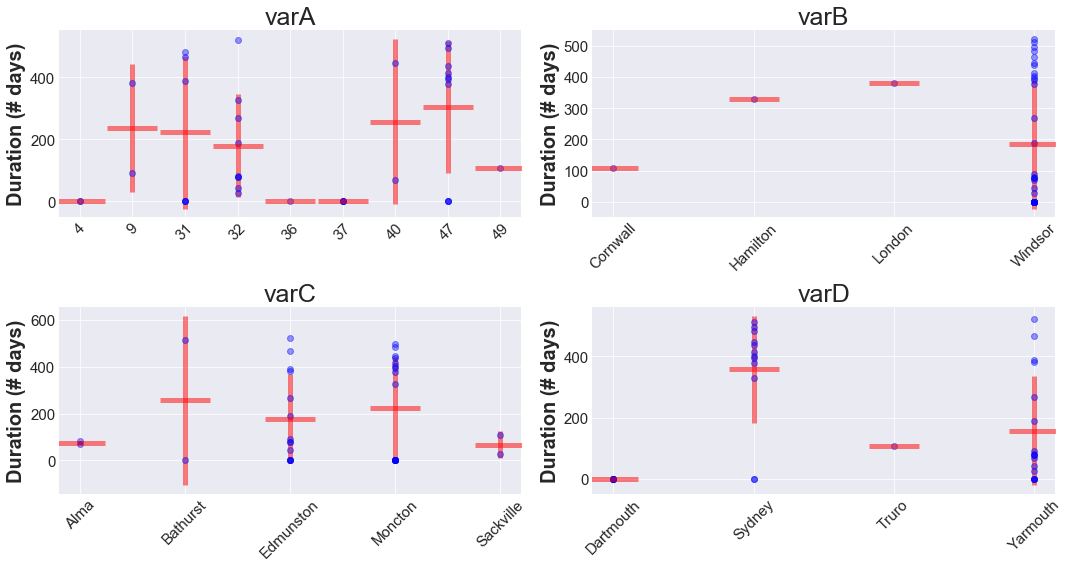

In [14]:
variables = ['varA','varB','varC','varD']
pannel = [(0,0),(0,1),(1,0),(1,1)]
days_spent = df_women['DaysSpent']

fig = plt.subplots(figsize=(width,height))

for var_i in range(len(variables)):
    df_avg = df_women.groupby(variables[var_i]).mean()
    df_std = df_women.groupby(variables[var_i]).std()
    var_entries = df_women[variables[var_i]]

    values = df_avg.index.values
    n_val = len(values)

    plt.subplot2grid((2,2),pannel[var_i])
    ind = np.arange(n_val)  # the x locations for the groups
    ind_indices = [np.where(values == x)[0]+1 for x in var_entries]
    xaxis = range(1,len(values)+1)
    plt.plot(ind_indices,days_spent,'bo',alpha=0.4)
    plt.errorbar(xaxis,df_avg['DaysSpent'],df_std['DaysSpent'],
                 color='r',fmt='_',linewidth=5,markersize=50,mew=5,alpha=0.5)
    plt.xticks(xaxis,values, rotation=45,fontsize=15)
    plt.ylabel('Duration (# days)')
    plt.title(variables[var_i])

plt.tight_layout()
plt.show()

### It seems like variables A,C and D could potentially give some information about the duration of the entry. Given that variables are anonymized, it's hard to extract meaningful informations out of it, but we can clearly see that some values for some variables have different average durations. I'll start a different notebook with some Machine learning applications.